In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('sobriete-consommation-electrique.csv', nrows=500, sep=';', header=0)

In [18]:
df.head()

,week,segment_client,tr_ref,tr_22_23,tr_23_24,tn_ref,tn_22_23,tn_23_24,tr_lissee_ref,tr_lissee_22_23,...,conso_tr_23_24,conso_tn_ref,conso_tn_22_23,conso_tn_23_24,conso_lissee_tr_ref,conso_lissee_tr_22_23,conso_lissee_tr_23_24,conso_lissee_tn_ref,conso_lissee_tn_22_23,conso_lissee_tn_23_24
0,31,Professionnels,18.600595,24.536607,19.787798,21.546726,21.579762,21.606250,20.314360,24.466964,...,5.576018e+05,5.927259e+05,6.075126e+05,5.722878e+05,2.399348e+06,2.557531e+06,2.337437e+06,2.418061e+06,2.453408e+06,2.343461e+06
1,32,Résidentiels,21.524107,25.446131,20.633929,21.217857,21.275298,21.330655,20.908780,24.624628,...,1.774025e+06,1.869564e+06,1.800534e+06,1.758083e+06,7.549076e+06,7.613840e+06,7.231169e+06,7.461982e+06,7.426897e+06,7.208201e+06
2,34,Entreprises,19.326488,22.795238,24.347917,20.053571,20.155060,20.253571,19.898735,23.700372,...,2.722145e+06,2.717485e+06,2.655165e+06,2.501034e+06,1.017160e+07,1.066109e+07,9.904049e+06,1.032044e+07,1.000222e+07,9.651619e+06
3,35,Professionnels,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,...,5.625737e+05,6.272159e+05,6.143826e+05,5.574172e+05,2.424429e+06,2.465184e+06,2.282957e+06,2.419446e+06,2.366923e+06,2.211275e+06
4,35,Entreprises,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,...,2.625853e+06,2.777478e+06,2.720039e+06,2.597389e+06,1.050385e+07,1.079894e+07,1.011737e+07,1.051945e+07,1.017096e+07,9.759256e+06


expploration des données 

In [20]:
df.columns 

Index(['week', 'segment_client', 'tr_ref', 'tr_22_23', 'tr_23_24', 'tn_ref',
       'tn_22_23', 'tn_23_24', 'tr_lissee_ref', 'tr_lissee_22_23',
       'tr_lissee_23_24', 'tn_lissee_ref', 'tn_lissee_22_23',
       'tn_lissee_23_24', 'conso_tr_ref', 'conso_tr_22_23', 'conso_tr_23_24',
       'conso_tn_ref', 'conso_tn_22_23', 'conso_tn_23_24',
       'conso_lissee_tr_ref', 'conso_lissee_tr_22_23', 'conso_lissee_tr_23_24',
       'conso_lissee_tn_ref', 'conso_lissee_tn_22_23',
       'conso_lissee_tn_23_24'],
      dtype='object')

In [21]:
def afficher_colonnes_par_type(data):
    """
    Affiche toutes les colonnes du DataFrame en fonction de leur type.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    for dtype in data.dtypes.unique():
        print(f"Colonnes de type {dtype}:")
        print(list(data.select_dtypes(include=[dtype]).columns))
        print()
# Afficher les colonnes par type
afficher_colonnes_par_type(df)

Colonnes de type int64:
['week']

Colonnes de type object:
['segment_client']

Colonnes de type float64:
['tr_ref', 'tr_22_23', 'tr_23_24', 'tn_ref', 'tn_22_23', 'tn_23_24', 'tr_lissee_ref', 'tr_lissee_22_23', 'tr_lissee_23_24', 'tn_lissee_ref', 'tn_lissee_22_23', 'tn_lissee_23_24', 'conso_tr_ref', 'conso_tr_22_23', 'conso_tr_23_24', 'conso_tn_ref', 'conso_tn_22_23', 'conso_tn_23_24', 'conso_lissee_tr_ref', 'conso_lissee_tr_22_23', 'conso_lissee_tr_23_24', 'conso_lissee_tn_ref', 'conso_lissee_tn_22_23', 'conso_lissee_tn_23_24']



In [22]:
def exploration_donnees(data,colonnes):
    """
    Effectue l'exploration des données.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    print("Informations sur les données:")
    print(data.info())
    print("\nStatistiques descriptives:")
    print(data.describe())
    data.drop(colonnes, axis=1)
    
exploration_donnees(df,'week')

Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   week                   156 non-null    int64  
 1   segment_client         156 non-null    object 
 2   tr_ref                 156 non-null    float64
 3   tr_22_23               156 non-null    float64
 4   tr_23_24               42 non-null     float64
 5   tn_ref                 156 non-null    float64
 6   tn_22_23               156 non-null    float64
 7   tn_23_24               42 non-null     float64
 8   tr_lissee_ref          156 non-null    float64
 9   tr_lissee_22_23        156 non-null    float64
 10  tr_lissee_23_24        42 non-null     float64
 11  tn_lissee_ref          156 non-null    float64
 12  tn_lissee_22_23        156 non-null    float64
 13  tn_lissee_23_24        42 non-null     float64
 14  conso_tr_ref           156 n

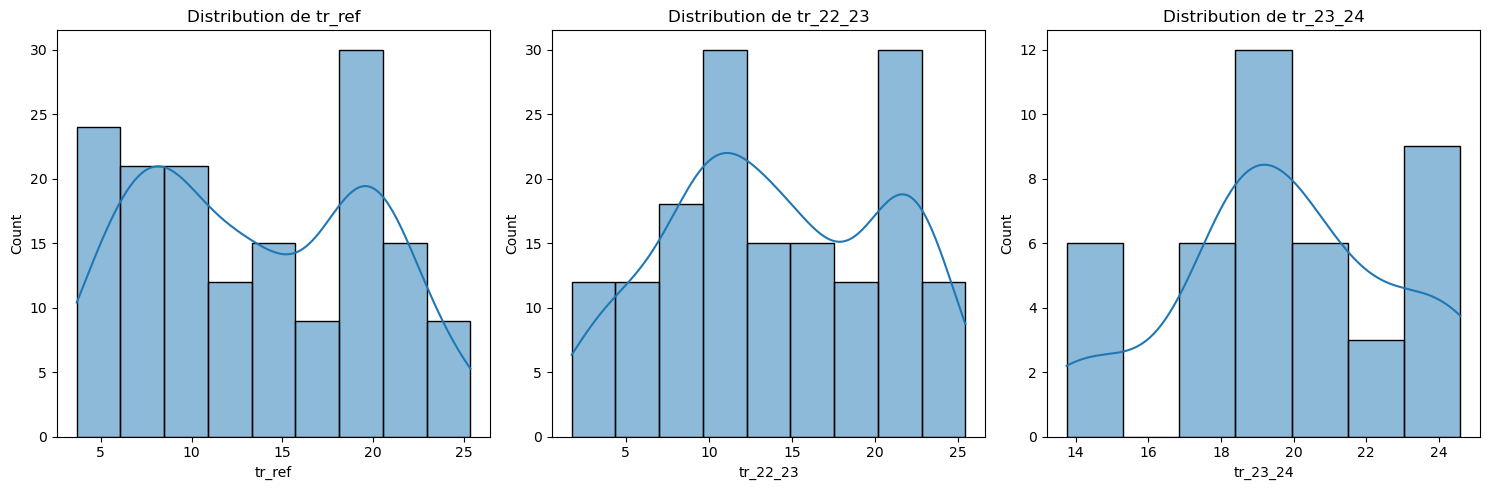

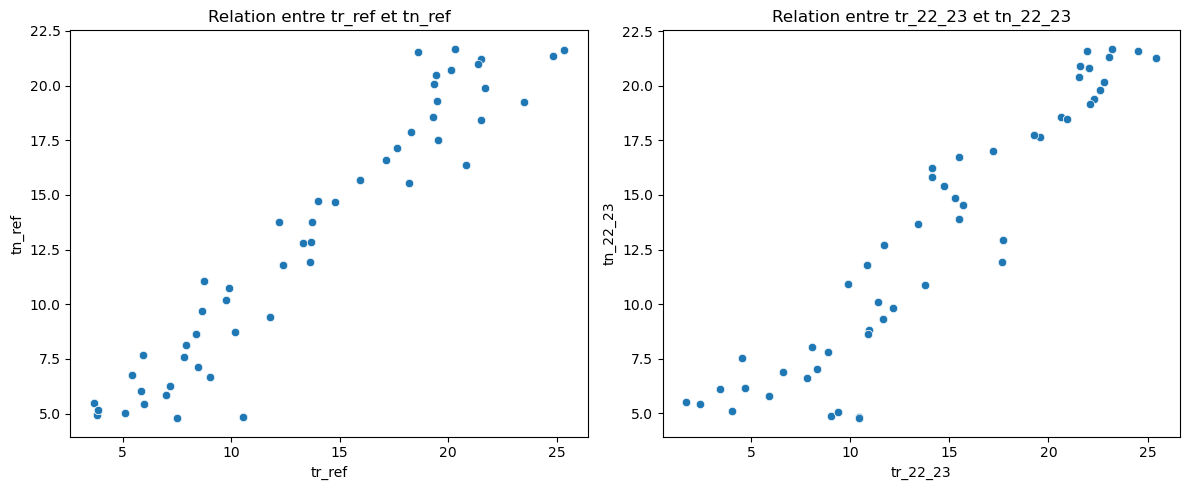

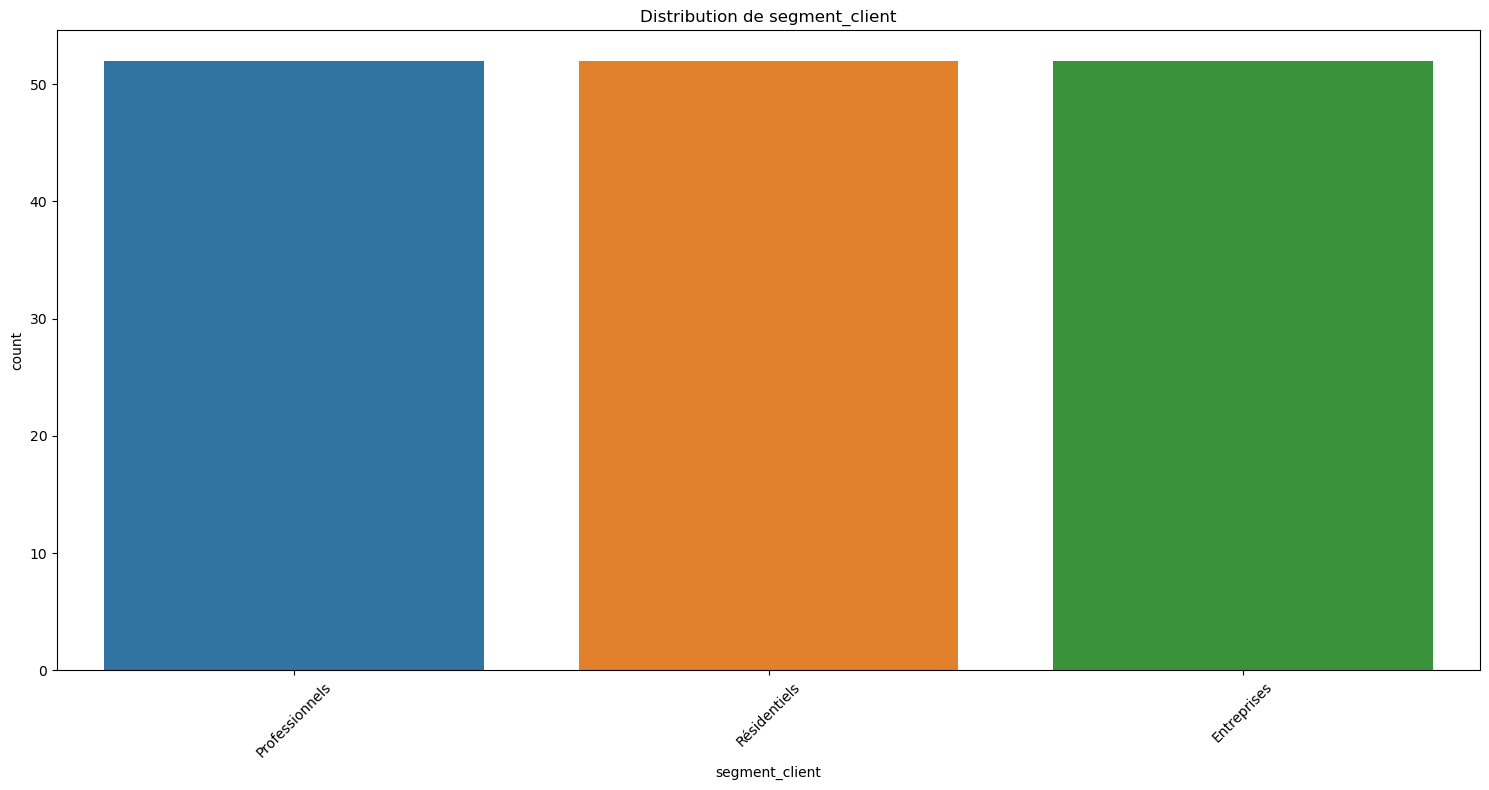

In [23]:


def visualisations(data):
    """
    Crée plusieurs visualisations pour explorer les données.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    # Histogrammes des variables numériques
    variables_numeriques = ['tr_ref', 'tr_22_23', 'tr_23_24']
    plt.figure(figsize=(15, 5))
    for i, variable in enumerate(variables_numeriques, 1):
        plt.subplot(1, len(variables_numeriques), i)
        sns.histplot(data[variable], kde=True)
        plt.title(f'Distribution de {variable}')
    plt.tight_layout()
    plt.show()
    
    # Graphiques de dispersion pour les relations entre variables
    variables_relations = [('tr_ref', 'tn_ref'), ('tr_22_23', 'tn_22_23')]
    plt.figure(figsize=(12, 5))
    for i, (variable1, variable2) in enumerate(variables_relations, 1):
        plt.subplot(1, len(variables_relations), i)
        sns.scatterplot(x=variable1, y=variable2, data=data)
        plt.title(f'Relation entre {variable1} et {variable2}')
    plt.tight_layout()
    plt.show()
      
    # Diagrammes à barres pour les variables catégorielles
    variables_categorielles = ['segment_client']
    plt.figure(figsize=(15, 8))
    for i, variable in enumerate(variables_categorielles, 1):
        plt.subplot(1, len(variables_categorielles), i)
        sns.countplot(x=variable, data=data)
        plt.title(f'Distribution de {variable}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Créer des visualisations pour votre ensemble de données
visualisations(df)



NETTOYAGE
valeurs abberantes

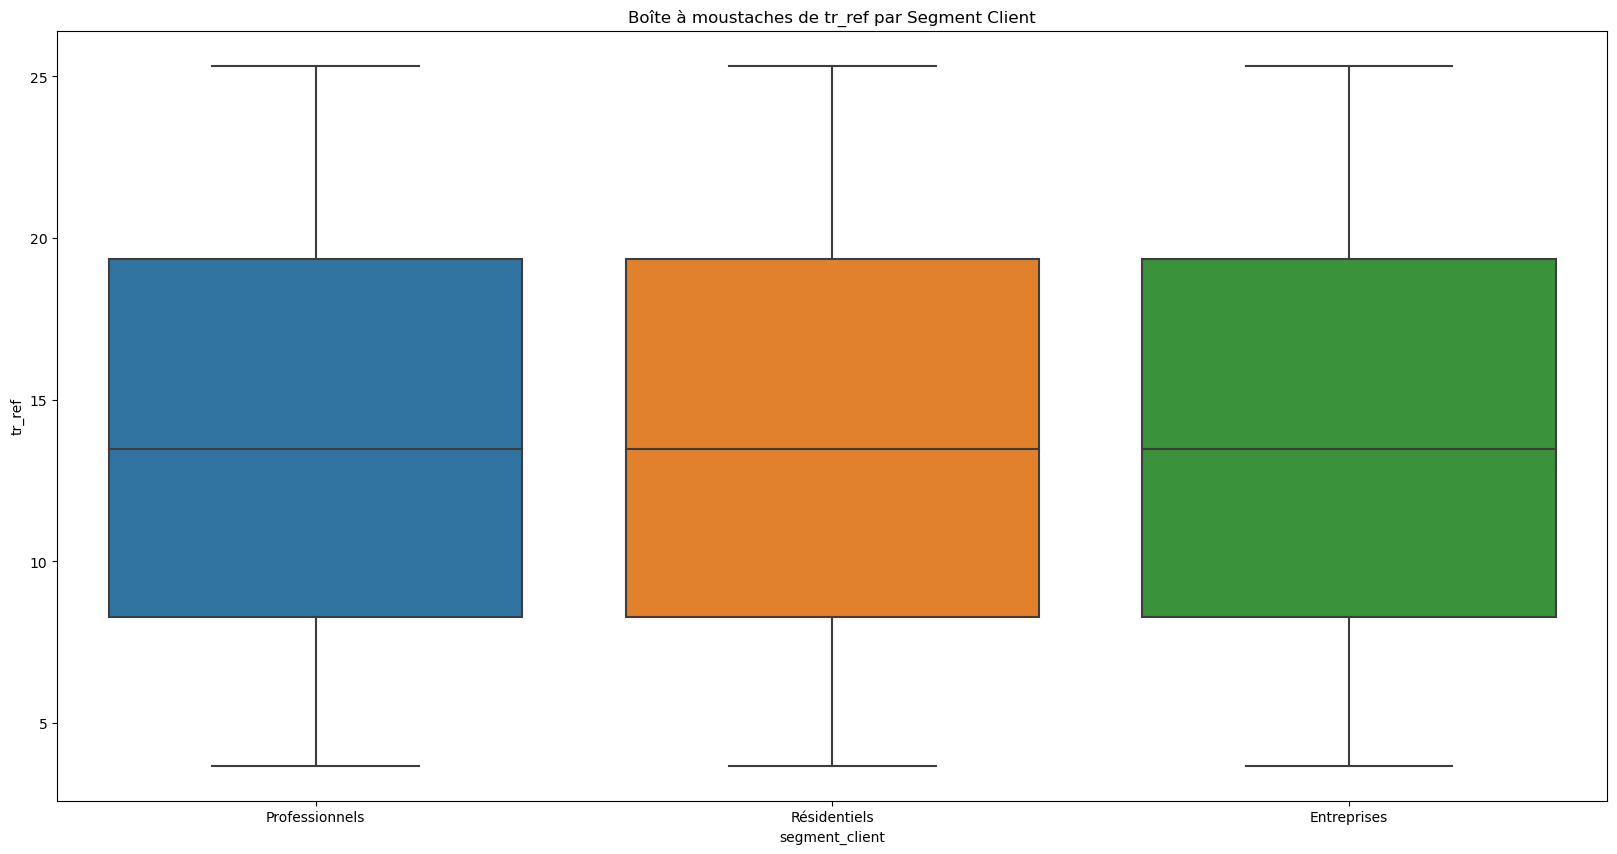

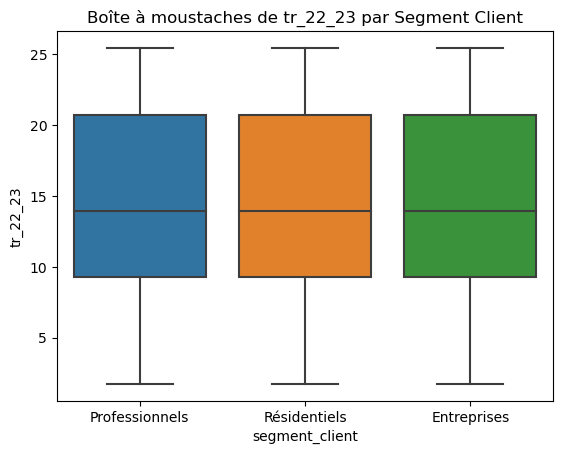

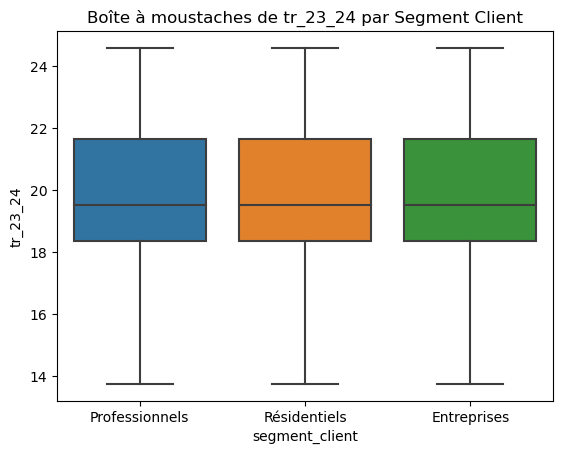

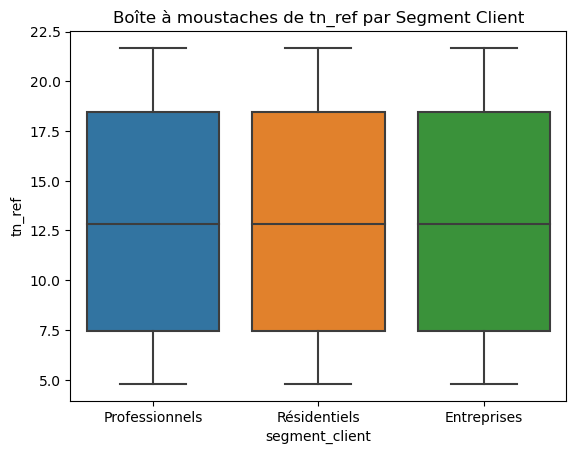

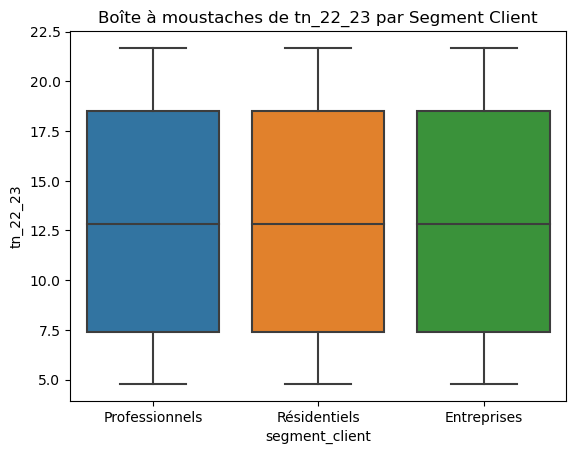

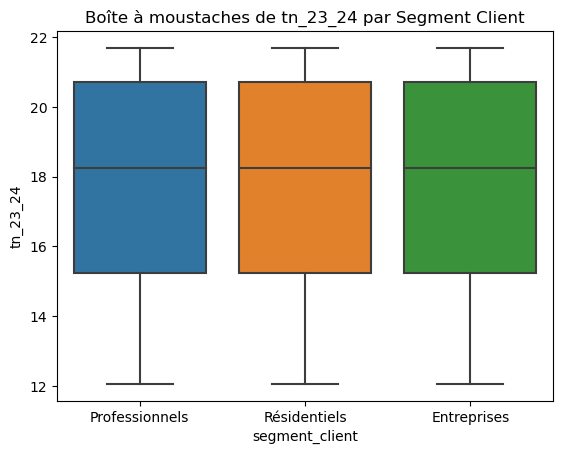

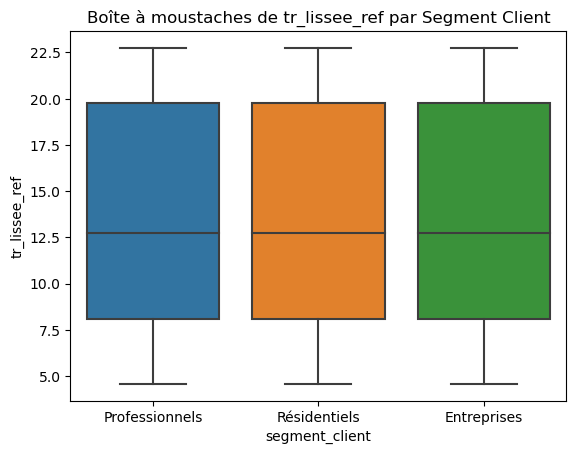

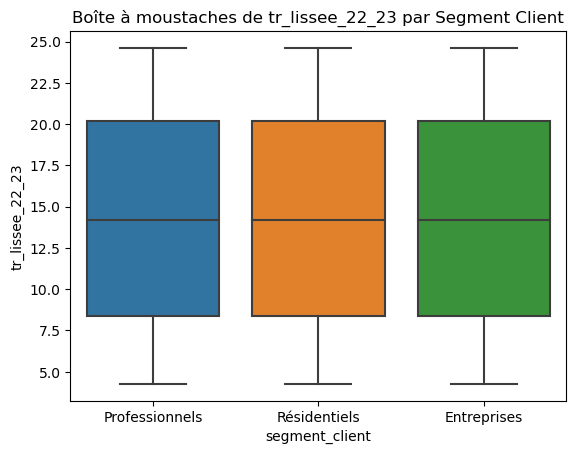

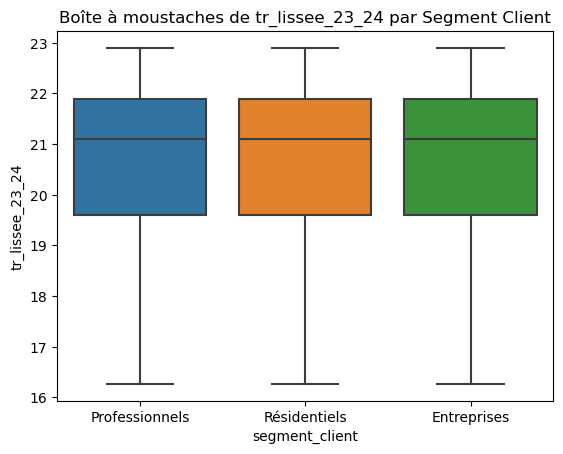

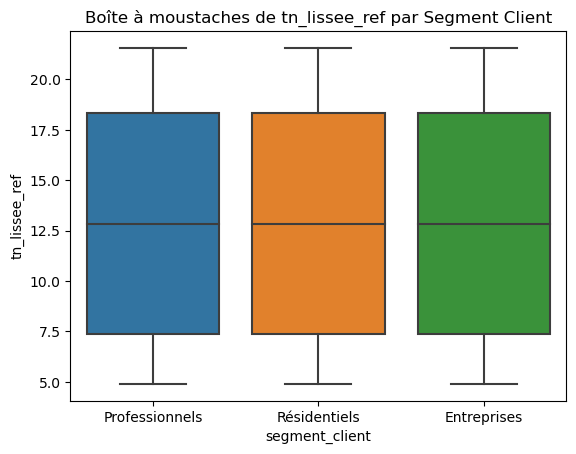

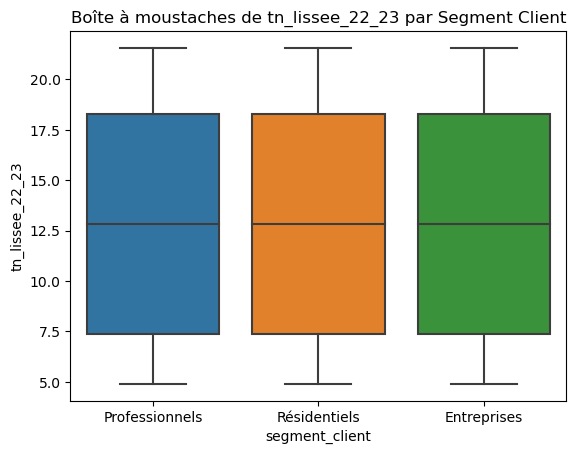

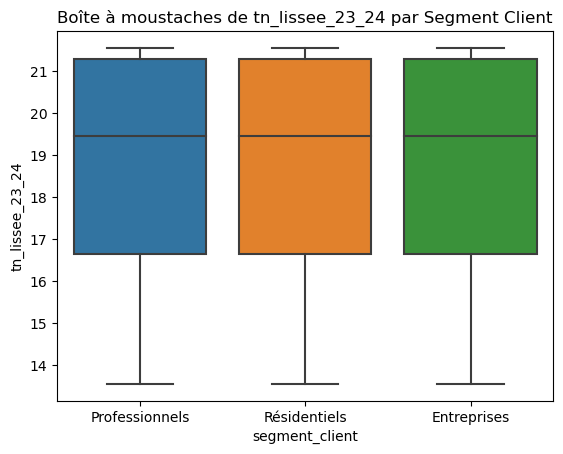

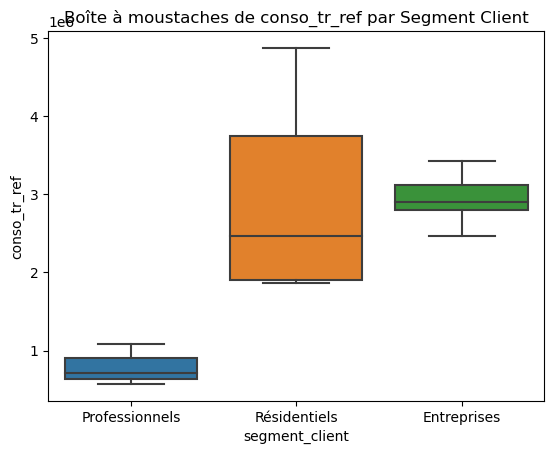

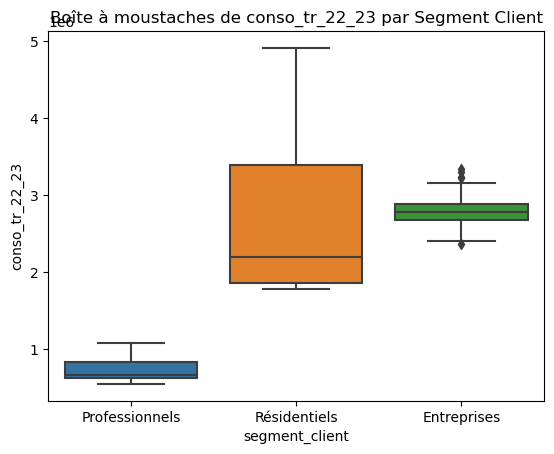

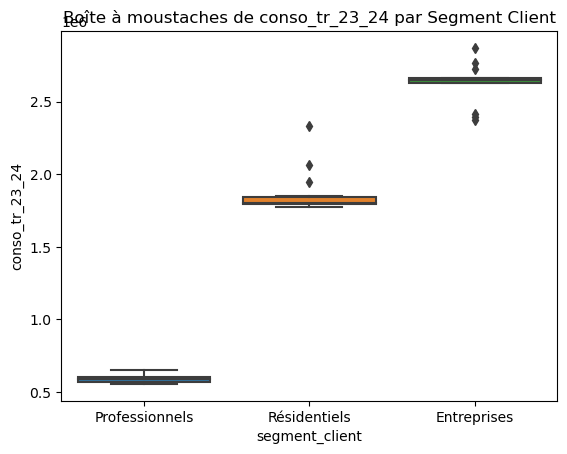

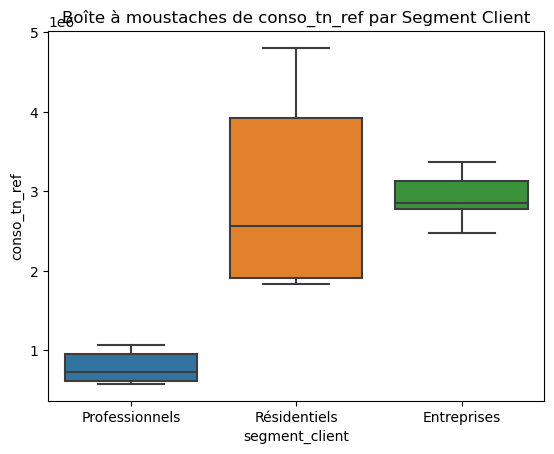

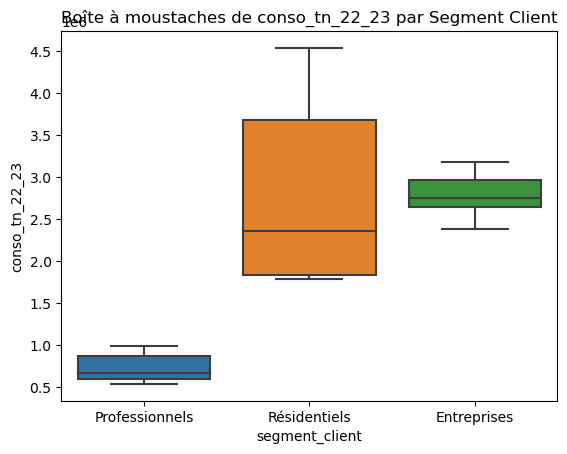

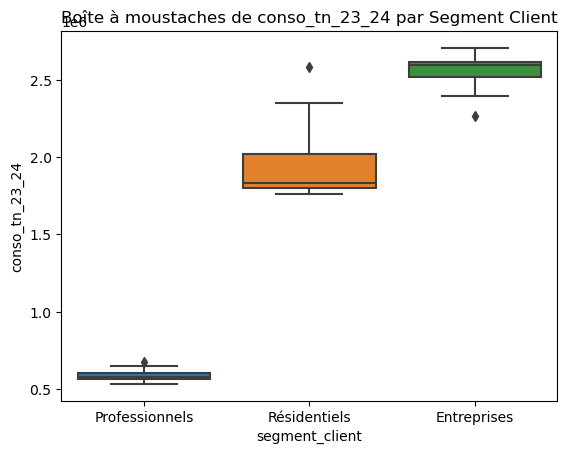

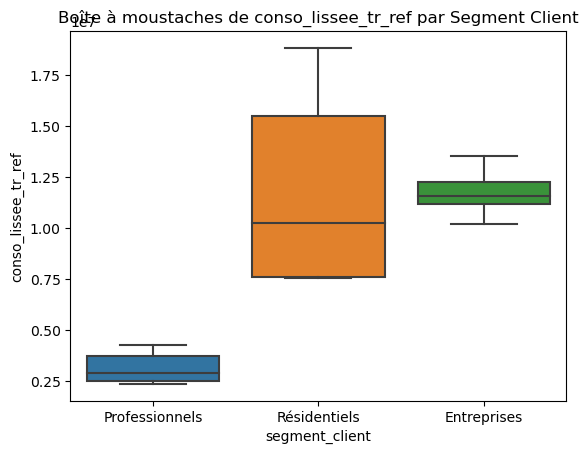

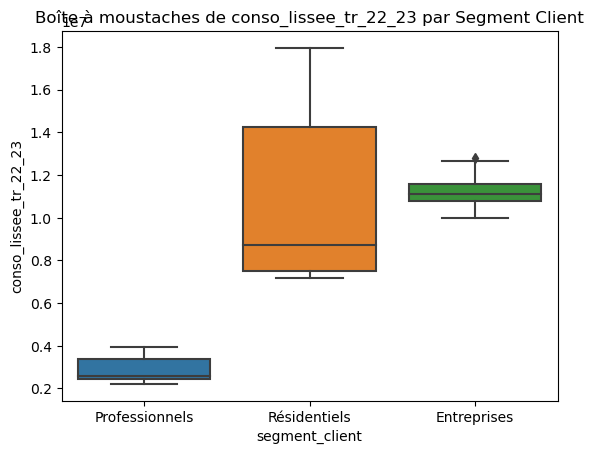

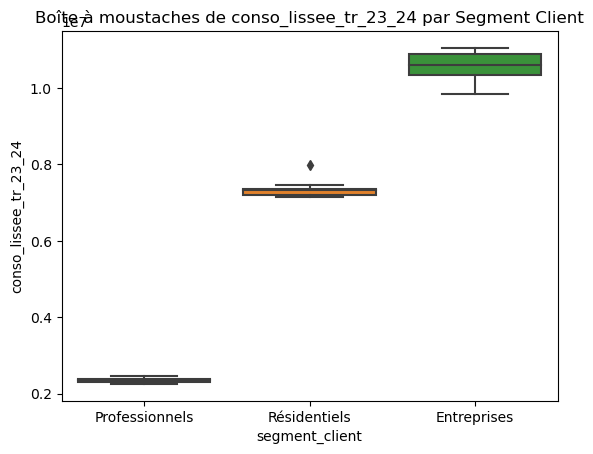

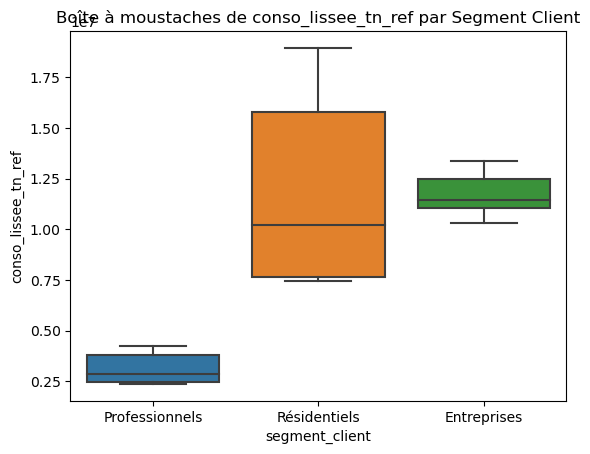

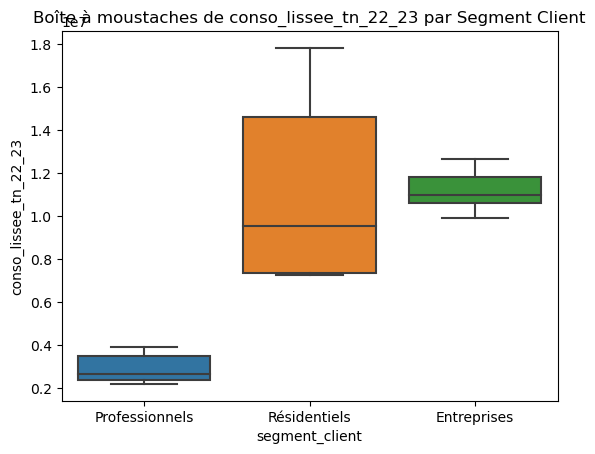

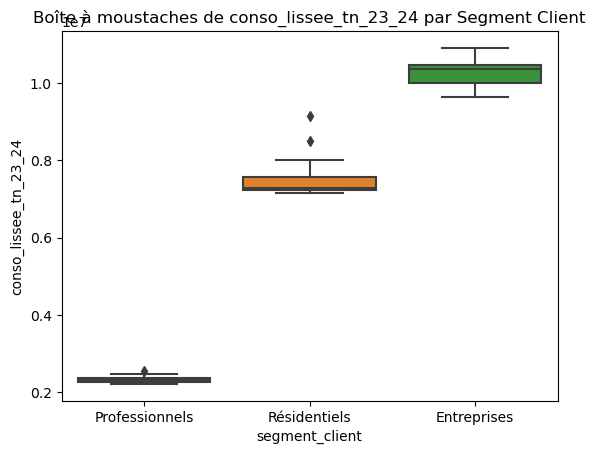

In [24]:


def visualisations_boite_moustache_dataset(data):
    """
    Crée plusieurs visualisations en boîtes à moustaches pour explorer les données.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    variables_numeriques = ['tr_ref', 'tr_22_23', 'tr_23_24', 'tn_ref', 'tn_22_23', 'tn_23_24', 'tr_lissee_ref', 'tr_lissee_22_23', 'tr_lissee_23_24', 'tn_lissee_ref', 'tn_lissee_22_23', 'tn_lissee_23_24', 'conso_tr_ref', 'conso_tr_22_23', 'conso_tr_23_24', 'conso_tn_ref', 'conso_tn_22_23', 'conso_tn_23_24', 'conso_lissee_tr_ref', 'conso_lissee_tr_22_23', 'conso_lissee_tr_23_24', 'conso_lissee_tn_ref', 'conso_lissee_tn_22_23', 'conso_lissee_tn_23_24']

    # Boîtes à moustaches des variables numériques par catégorie de la variable cible
    plt.figure(figsize=(20, 10))
    for variable in variables_numeriques:
        sns.boxplot(x='segment_client', y=variable, data=data)
        plt.title(f'Boîte à moustaches de {variable} par Segment Client')
        plt.show()

# Créer des visualisations pour votre ensemble de données
visualisations_boite_moustache_dataset(df)


recherche des valeurs manquantes

In [26]:
def afficher_valeurs_manquantes(data):
    """
    Affiche le nombre de valeurs manquantes par colonne dans le DataFrame.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    valeurs_manquantes = data.isnull().sum()
    if valeurs_manquantes.sum() == 0:
        print("Aucune valeur manquante trouvée.")
    else:
        print("Valeurs manquantes par colonne :")
        print(valeurs_manquantes[valeurs_manquantes > 0])

# Appeler la fonction pour afficher les valeurs manquantes
afficher_valeurs_manquantes(df)


Valeurs manquantes par colonne :
tr_23_24                 114
tn_23_24                 114
tr_lissee_23_24          114
tn_lissee_23_24          114
conso_tr_23_24           114
conso_tn_23_24           114
conso_lissee_tr_23_24    114
conso_lissee_tn_23_24    114
dtype: int64


In [27]:
def remplacer_valeurs_manquantes(data):
    """
    Remplace les valeurs manquantes par la moyenne de chaque colonne.
    Args:
        data (DataFrame): DataFrame contenant les données.
    Returns:
        DataFrame: DataFrame avec les valeurs manquantes remplacées.
    """
    data_remplace = data.fillna(data.mean())
    return data_remplace

# Appeler la fonction pour remplacer les valeurs manquantes
df_sans_manquantes = remplacer_valeurs_manquantes(df)


C:\Users\alimo\AppData\Local\Temp\ipykernel_7144\3320331619.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_remplace = data.fillna(data.mean())


In [30]:
afficher_valeurs_manquantes(df_sans_manquantes)

Aucune valeur manquante trouvée.


# Suppresion des valeurs abberantes

In [31]:


def supprimer_valeurs_aberrantes(data, seuil=1.5):
    """
    Supprime les valeurs aberrantes en utilisant la méthode des écarts interquartiles (IQR).
    Args:
        data (DataFrame): DataFrame contenant les données.
        seuil (float): Seuil pour définir les valeurs aberrantes. Par défaut, seuil=1.5.
    Returns:
        DataFrame: DataFrame sans les valeurs aberrantes.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    data_sans_aberrantes = data[~((data < (Q1 - seuil * IQR)) | (data > (Q3 + seuil * IQR))).any(axis=1)]

    return data_sans_aberrantes

# Appeler la fonction pour supprimer les valeurs aberrantes
df_sans_aberrantes = supprimer_valeurs_aberrantes(df)


C:\Users\alimo\AppData\Local\Temp\ipykernel_7144\1656876790.py:14: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_sans_aberrantes = data[~((data < (Q1 - seuil * IQR)) | (data > (Q3 + seuil * IQR))).any(axis=1)]


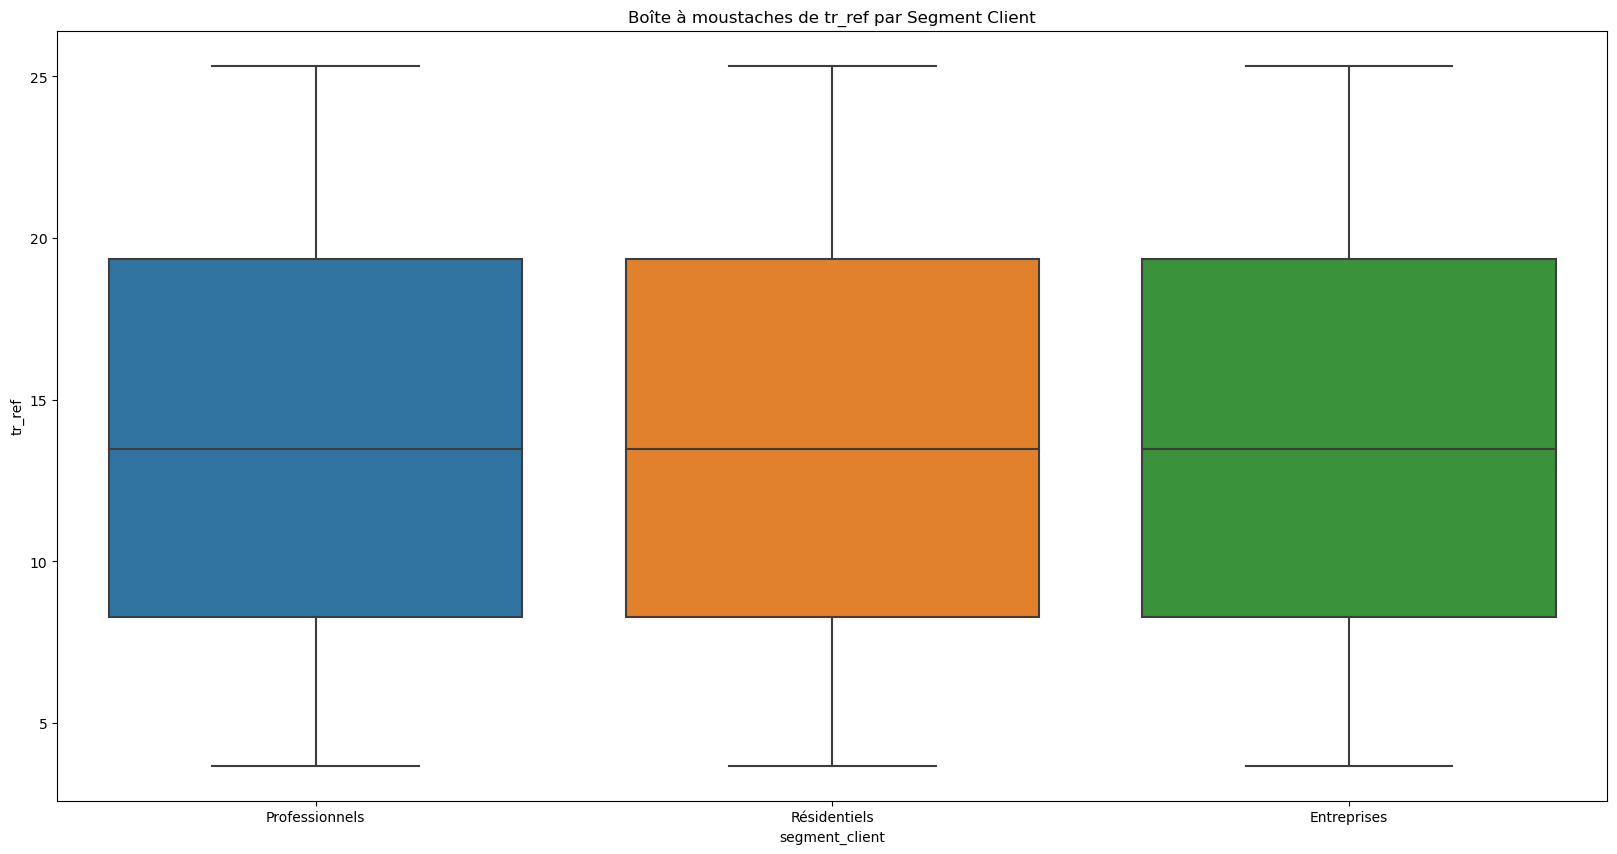

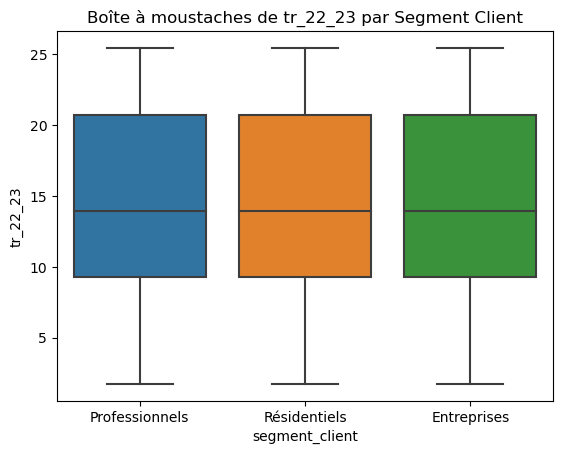

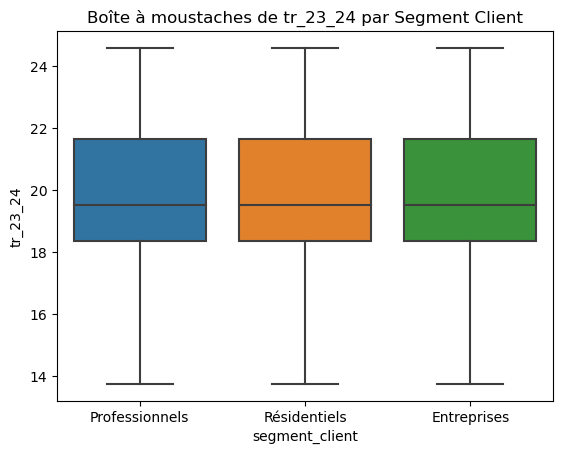

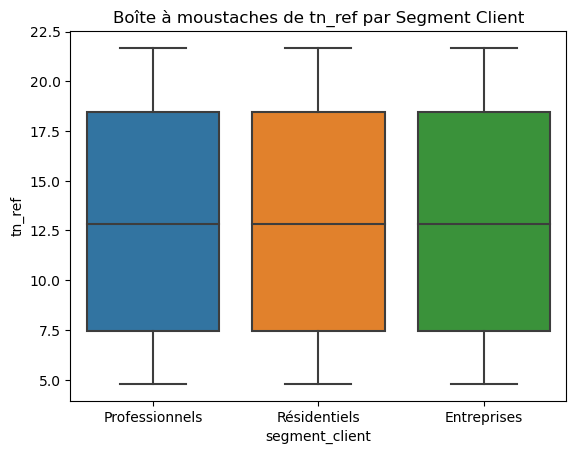

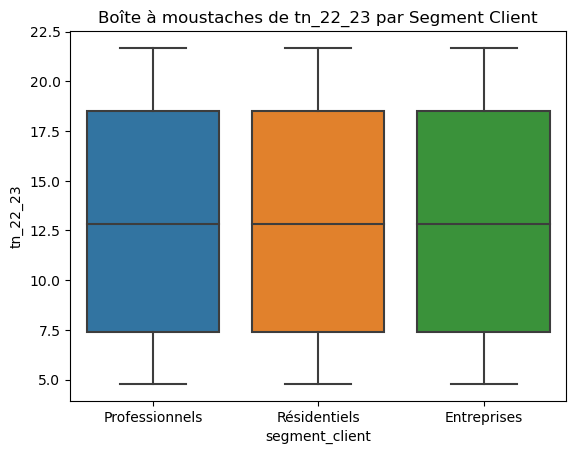

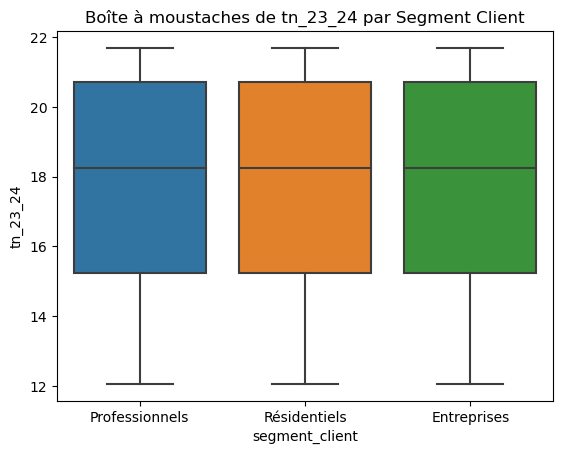

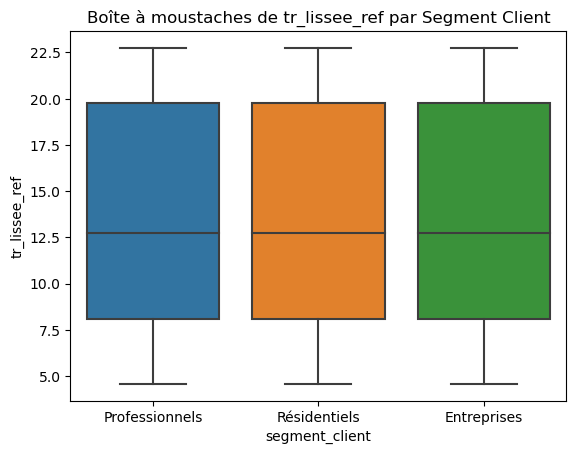

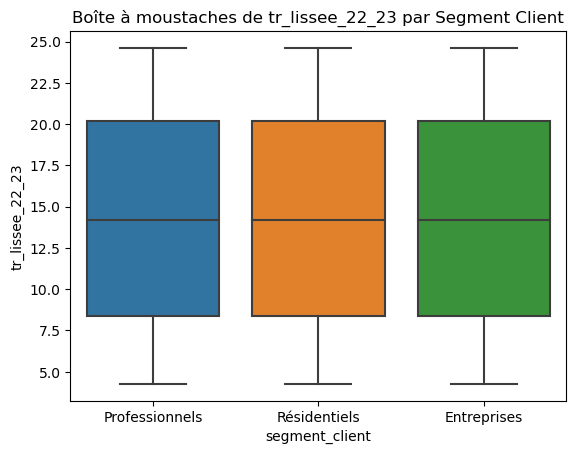

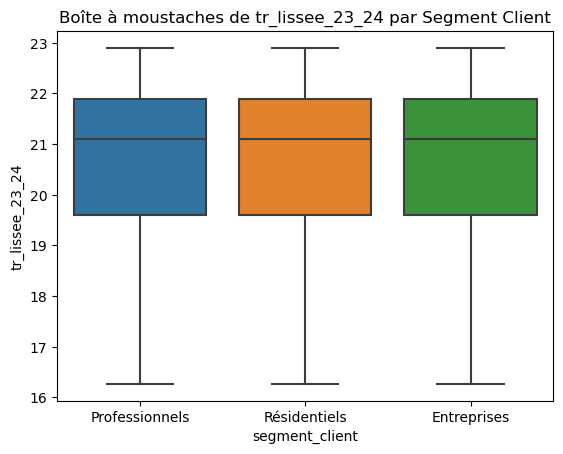

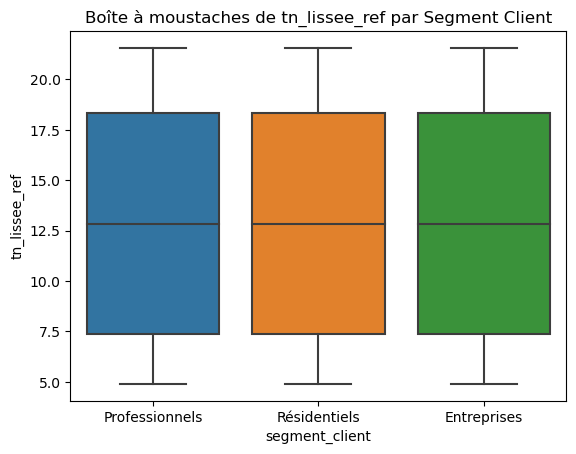

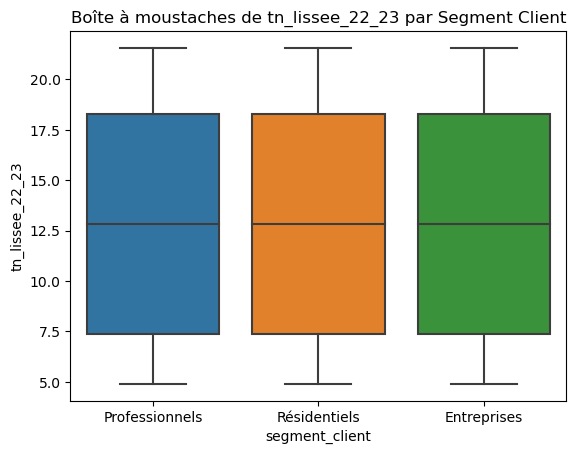

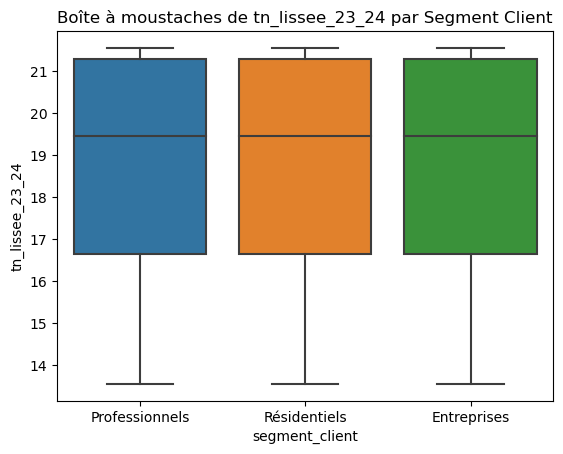

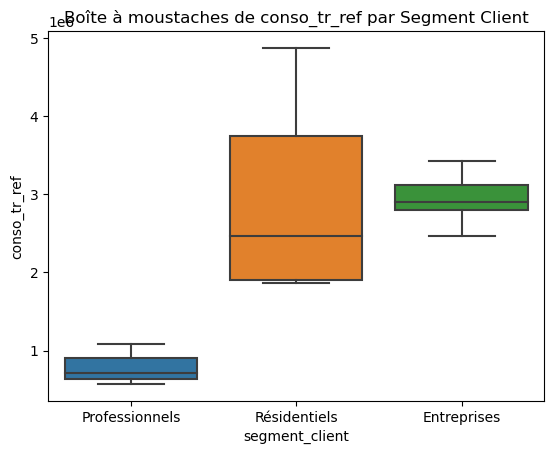

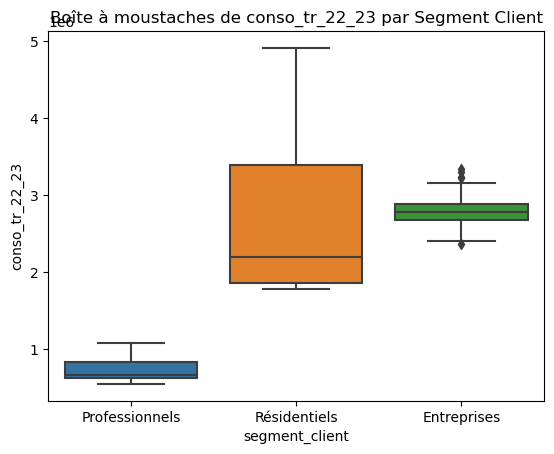

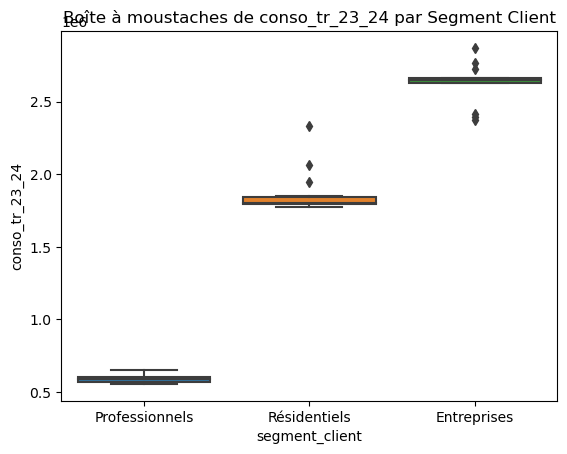

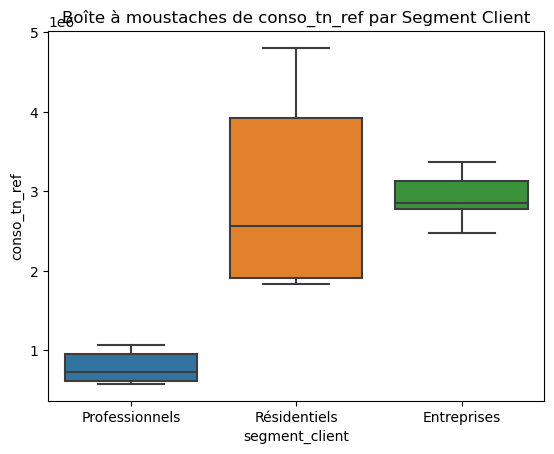

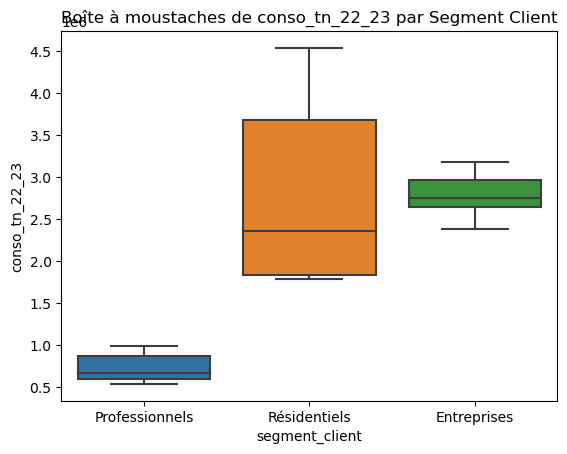

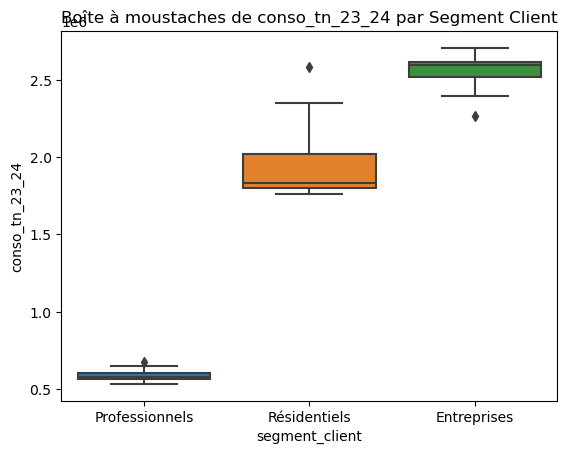

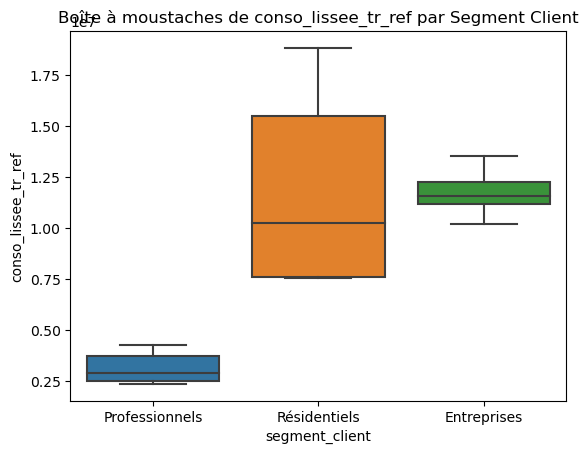

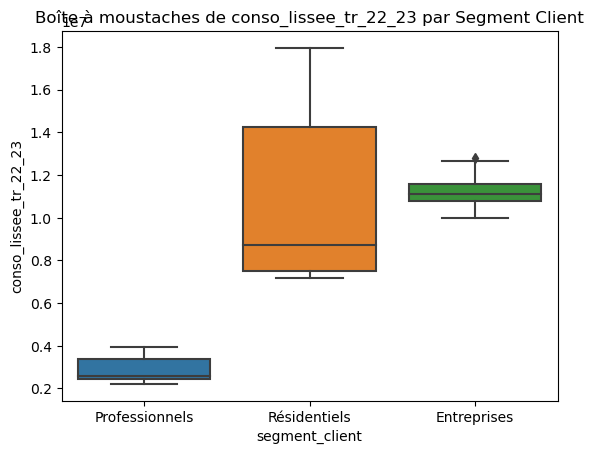

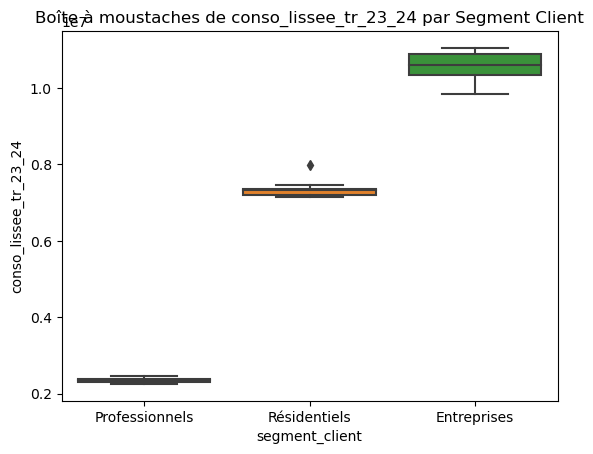

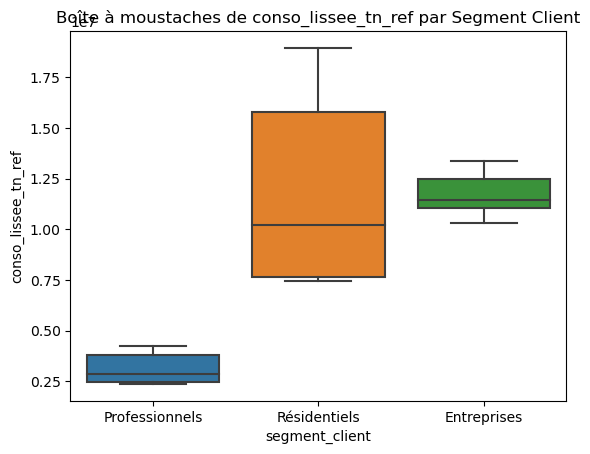

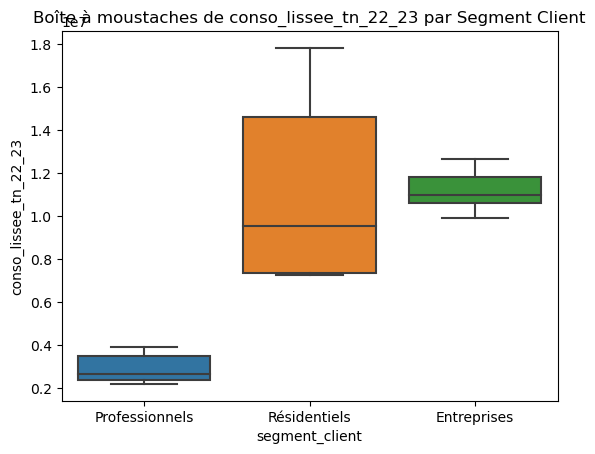

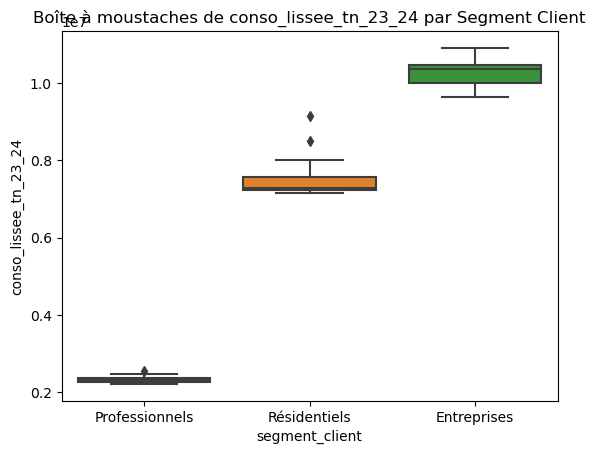

In [32]:
visualisations_boite_moustache_dataset(df_sans_aberrantes)

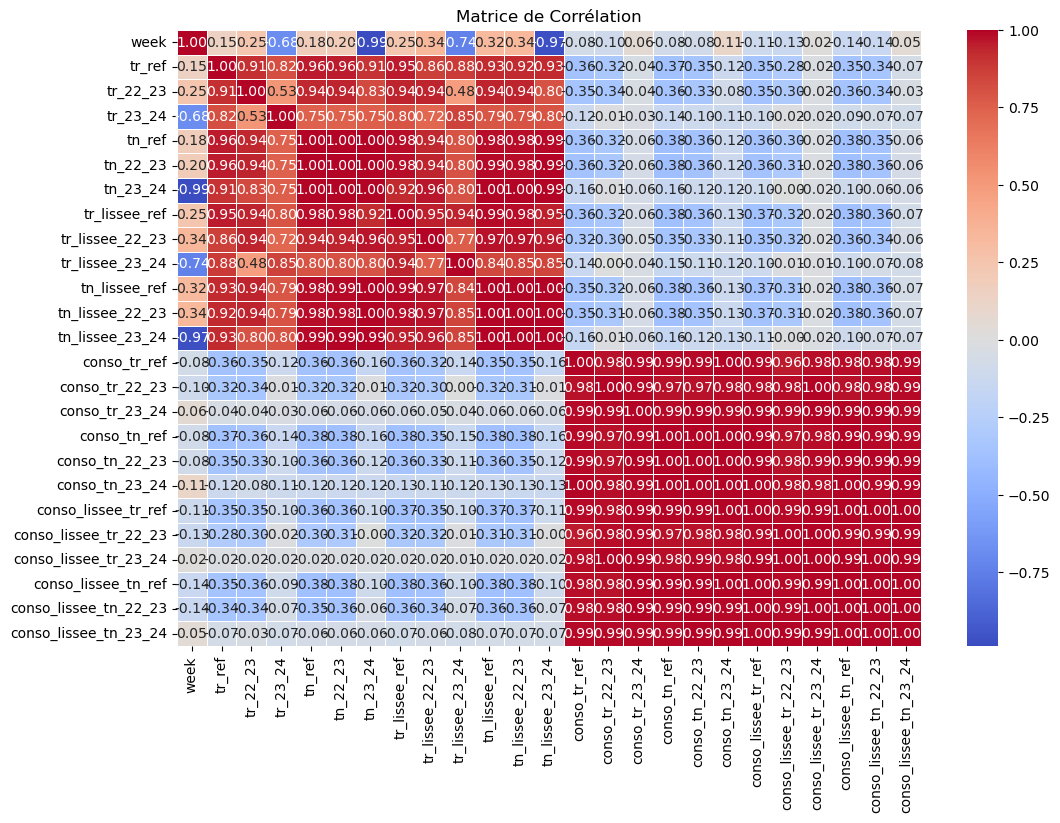

In [33]:


def afficher_matrice_correlation(data):
    """
    Affiche la matrice de corrélation pour les variables numériques du DataFrame.
    Args:
        data (DataFrame): DataFrame contenant les données.
    """
    correlation_matrix = data.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Matrice de Corrélation')
    plt.show()

# Appeler la fonction pour afficher la matrice de corrélation
afficher_matrice_correlation(df)


# Encodage des variables catégorielles

In [37]:


def encoder_variables_categorielles(data):
    """
    Effectue l'encodage one-hot des variables catégorielles dans le DataFrame.
    Args:
        data (DataFrame): DataFrame contenant les données.
    Returns:
        DataFrame: DataFrame avec les variables catégorielles encodées en one-hot.
    """
    # Sélectionner les colonnes catégorielles
    colonnes_categorielles = data.select_dtypes(include=['object']).columns.tolist()

    # Effectuer l'encodage one-hot
    data_encodé = pd.get_dummies(data, columns=colonnes_categorielles, drop_first=True)

    return data_encodé

# Appeler la fonction pour encoder les variables catégorielles
df_encodé = encoder_variables_categorielles(df)



In [45]:

df_encodé 

,week,tr_ref,tr_22_23,tr_23_24,tn_ref,tn_22_23,tn_23_24,tr_lissee_ref,tr_lissee_22_23,tr_lissee_23_24,...,conso_tn_22_23,conso_tn_23_24,conso_lissee_tr_ref,conso_lissee_tr_22_23,conso_lissee_tr_23_24,conso_lissee_tn_ref,conso_lissee_tn_22_23,conso_lissee_tn_23_24,segment_client_Professionnels,segment_client_Résidentiels
0,31,18.600595,24.536607,19.787798,21.546726,21.579762,21.606250,20.314360,24.466964,21.362500,...,6.075126e+05,5.722878e+05,2.399348e+06,2.557531e+06,2.337437e+06,2.418061e+06,2.453408e+06,2.343461e+06,1,0
1,32,21.524107,25.446131,20.633929,21.217857,21.275298,21.330655,20.908780,24.624628,20.755506,...,1.800534e+06,1.758083e+06,7.549076e+06,7.613840e+06,7.231169e+06,7.461982e+06,7.426897e+06,7.208201e+06,0,1
2,34,19.326488,22.795238,24.347917,20.053571,20.155060,20.253571,19.898735,23.700372,22.042560,...,2.655165e+06,2.501034e+06,1.017160e+07,1.066109e+07,9.904049e+06,1.032044e+07,1.000222e+07,9.651619e+06,0,0
3,35,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,21.913616,...,6.143826e+05,5.574172e+05,2.424429e+06,2.465184e+06,2.282957e+06,2.419446e+06,2.366923e+06,2.211275e+06,1,0
4,35,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,21.913616,...,2.720039e+06,2.597389e+06,1.050385e+07,1.079894e+07,1.011737e+07,1.051945e+07,1.017096e+07,9.759256e+06,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,17,13.737202,13.399702,NaN,13.783036,13.652679,NaN,12.458036,11.461086,NaN,...,6.077138e+05,NaN,2.847975e+06,2.688169e+06,NaN,2.826756e+06,2.601865e+06,NaN,1,0
152,23,19.307738,20.952083,NaN,18.570833,18.472321,NaN,19.021131,17.887202,NaN,...,5.483604e+05,NaN,2.377428e+06,2.220734e+06,NaN,2.373229e+06,2.186098e+06,NaN,1,0
153,26,19.451488,21.552679,NaN,20.468750,20.389583,NaN,20.985640,21.794345,NaN,...,1.816858e+06,NaN,7.558808e+06,7.168475e+06,NaN,7.584584e+06,7.242511e+06,NaN,0,1
154,26,19.451488,21.552679,NaN,20.468750,20.389583,NaN,20.985640,21.794345,NaN,...,2.700490e+06,NaN,1.154163e+07,1.105102e+07,NaN,1.122782e+07,1.060806e+07,NaN,0,0


In [48]:
# Supprimer les lignes contenant des valeurs NaN dans le DataFrame encodé
df_encode_sans_nan = df_encodé  .dropna()

# Afficher un aperçu du DataFrame sans NaN
print("Aperçu du DataFrame sans NaN :")
df_encode_sans_nan


Aperçu du DataFrame sans NaN :


,week,tr_ref,tr_22_23,tr_23_24,tn_ref,tn_22_23,tn_23_24,tr_lissee_ref,tr_lissee_22_23,tr_lissee_23_24,...,conso_tn_22_23,conso_tn_23_24,conso_lissee_tr_ref,conso_lissee_tr_22_23,conso_lissee_tr_23_24,conso_lissee_tn_ref,conso_lissee_tn_22_23,conso_lissee_tn_23_24,segment_client_Professionnels,segment_client_Résidentiels
0,31,18.600595,24.536607,19.787798,21.546726,21.579762,21.606250,20.314360,24.466964,21.362500,...,6.075126e+05,5.722878e+05,2.399348e+06,2.557531e+06,2.337437e+06,2.418061e+06,2.453408e+06,2.343461e+06,1,0
1,32,21.524107,25.446131,20.633929,21.217857,21.275298,21.330655,20.908780,24.624628,20.755506,...,1.800534e+06,1.758083e+06,7.549076e+06,7.613840e+06,7.231169e+06,7.461982e+06,7.426897e+06,7.208201e+06,0,1
2,34,19.326488,22.795238,24.347917,20.053571,20.155060,20.253571,19.898735,23.700372,22.042560,...,2.655165e+06,2.501034e+06,1.017160e+07,1.066109e+07,9.904049e+06,1.032044e+07,1.000222e+07,9.651619e+06,0,0
3,35,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,21.913616,...,6.143826e+05,5.574172e+05,2.424429e+06,2.465184e+06,2.282957e+06,2.419446e+06,2.366923e+06,2.211275e+06,1,0
4,35,19.484524,22.295238,19.272024,19.284226,19.400000,19.515179,20.119717,23.140030,21.913616,...,2.720039e+06,2.597389e+06,1.050385e+07,1.079894e+07,1.011737e+07,1.051945e+07,1.017096e+07,9.759256e+06,0,0
5,38,17.123512,15.484821,18.471131,16.606845,16.739286,16.870536,19.407217,19.493527,21.073810,...,6.225047e+05,5.815800e+05,2.570850e+06,2.532464e+06,2.360099e+06,2.541177e+06,2.480969e+06,2.283189e+06,1,0
6,40,13.997619,15.262798,18.027976,14.730655,14.866667,15.001488,16.648214,16.111458,19.220461,...,2.030065e+06,2.053166e+06,8.044977e+06,7.683888e+06,7.145734e+06,8.077175e+06,7.449480e+06,7.651704e+06,0,1
7,41,12.195238,15.470833,18.320833,13.772917,13.910119,14.048214,14.817187,15.089509,18.309821,...,2.167519e+06,2.174783e+06,8.662334e+06,7.881038e+06,7.174401e+06,8.469520e+06,7.810606e+06,8.006565e+06,0,1
29,30,20.292262,23.177976,20.634226,21.685119,21.687798,21.687202,20.476786,23.681845,21.813839,...,6.161201e+05,5.895258e+05,2.420743e+06,2.552301e+06,2.369717e+06,2.432185e+06,2.473852e+06,2.352074e+06,1,0
30,37,19.519345,19.558631,21.963393,17.528869,17.658929,17.788690,19.957961,21.321131,22.543006,...,2.732148e+06,2.588103e+06,1.119419e+07,1.132858e+07,1.098642e+07,1.102250e+07,1.085099e+07,1.025502e+07,0,0


Normalisation des données 

In [50]:
from sklearn.preprocessing import MinMaxScaler

def normaliser_donnees(data, colonnes_numeriques=None):
    """
    Normalise les données numériques dans le DataFrame en utilisant la normalisation Min-Max.
    Args:
        data (DataFrame): DataFrame contenant les données.
        colonnes_numeriques (list, optional): Liste des colonnes numériques à normaliser. 
            Si non spécifié, toutes les colonnes numériques seront normalisées.
    Returns:
        DataFrame: DataFrame avec les données numériques normalisées.
    """
    if colonnes_numeriques is None:
        colonnes_numeriques = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    scaler = MinMaxScaler()
    data_normalisé = data.copy()
    data_normalisé[colonnes_numeriques] = scaler.fit_transform(data_normalisé[colonnes_numeriques])

    return data_normalisé

# Appeler la fonction pour normaliser les données
df_normalisé = normaliser_donnees(df_encode_sans_nan)


In [51]:
df_normalisé

,week,tr_ref,tr_22_23,tr_23_24,tn_ref,tn_22_23,tn_23_24,tr_lissee_ref,tr_lissee_22_23,tr_lissee_23_24,...,conso_tn_22_23,conso_tn_23_24,conso_lissee_tr_ref,conso_lissee_tr_22_23,conso_lissee_tr_23_24,conso_lissee_tn_ref,conso_lissee_tn_22_23,conso_lissee_tn_23_24,segment_client_Professionnels,segment_client_Résidentiels
0,0.076923,0.686617,0.919558,0.557036,0.986032,0.988937,0.991583,0.925067,0.983465,0.767863,...,0.018273,0.017822,0.003412,0.010566,0.009225,0.003764,0.010577,0.015179,1,0
1,0.153846,1.000000,1.000000,0.635106,0.952839,0.957760,0.962930,1.000000,1.000000,0.676355,...,0.560436,0.563553,0.565391,0.555364,0.565372,0.554871,0.574089,0.573784,0,1
2,0.307692,0.764428,0.765544,0.977784,0.835329,0.843047,0.850947,0.872673,0.903068,0.870387,...,0.948819,0.905477,0.851581,0.883693,0.869131,0.867192,0.865881,0.854355,0,0
3,0.384615,0.781369,0.721321,0.509447,0.757679,0.765729,0.774177,0.900530,0.844302,0.850948,...,0.021395,0.010978,0.006149,0.000616,0.003033,0.003915,0.000778,0.000000,1,0
4,0.384615,0.781369,0.721321,0.509447,0.757679,0.765729,0.774177,0.900530,0.844302,0.850948,...,0.978301,0.949822,0.887839,0.898546,0.893374,0.888935,0.884999,0.866715,0,0
5,0.615385,0.528282,0.118979,0.435550,0.487452,0.493272,0.499217,0.810712,0.461873,0.724341,...,0.025086,0.022098,0.022128,0.007865,0.011800,0.017216,0.013700,0.008258,1,0
6,0.769231,0.193205,0.099342,0.394662,0.298089,0.301515,0.304894,0.462909,0.107177,0.444936,...,0.664745,0.699358,0.619507,0.562911,0.555663,0.622088,0.576647,0.624710,0,1
7,0.846154,0.000000,0.117742,0.421683,0.201425,0.203564,0.205783,0.232089,0.000000,0.307650,...,0.727210,0.755329,0.686878,0.584153,0.558921,0.664957,0.617564,0.665458,0,1
29,0.000000,0.867953,0.799395,0.635133,1.000000,1.000000,1.000000,0.945542,0.901125,0.835906,...,0.022185,0.025755,0.005747,0.010002,0.012893,0.005307,0.012894,0.016168,1,0
30,0.538462,0.785101,0.479284,0.757771,0.580512,0.587443,0.594676,0.880139,0.653544,0.945833,...,0.983804,0.945548,0.963174,0.955612,0.992137,0.943899,0.962048,0.923642,0,0


diviser les données Test et entrainement 

In [57]:
from sklearn.model_selection import train_test_split

def diviser_entrainement_test(data, variable_cible='conso_tr_23_24', test_size=0.2, random_state=None):
    """
    Divise les données en ensembles d'entraînement et de test.
    Args:
        data (DataFrame): DataFrame contenant les données.
        variable_cible (str, optional): Nom de la variable cible. Par défaut, 'conso_tr_23_24'.
        test_size (float, optional): Proportion des données à utiliser pour l'ensemble de test. 
            Par défaut, test_size=0.2.
        random_state (int, optional): Seed pour la reproductibilité. Par défaut, random_state=None.
    Returns:
        tuple: (X_train, X_test, y_train, y_test)
    """
    X = data.drop(variable_cible, axis=1)
    y = data[variable_cible]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Appeler la fonction pour diviser les données
X_train, X_test, y_train, y_test = diviser_entrainement_test(df_encode_sans_nan, variable_cible='conso_tr_23_24', test_size=0.2, random_state=42)


Entrainer plusieurs models 

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

def entrainer_modeles(X_train, y_train):
    """
    Entraîne plusieurs modèles sur les données d'entraînement.
    Args:
        X_train (DataFrame): Ensemble d'entraînement des caractéristiques.
        y_train (Series): Ensemble d'entraînement de la variable cible.
    Returns:
        dict: Dictionnaire contenant les modèles entraînés.
    """
    modeles = {
        'RegressionLineaire': LinearRegression(),
        'ForetAleatoire': RandomForestRegressor(n_estimators=100, random_state=42)
        # Ajoutez d'autres modèles au besoin
    }

    modeles_entraines = {}

    for nom_modele, modele in modeles.items():
        modele.fit(X_train, y_train)
        modeles_entraines[nom_modele] = modele

    return modeles_entraines

# Appeler la fonction pour entraîner les modèles
modeles_entraines = entrainer_modeles(X_train, y_train)


In [59]:
from sklearn.metrics import r2_score

def evaluer_modeles(modeles_entraines, X_test, y_test):
    """
    Évalue les performances des modèles sur l'ensemble de test.
    Args:
        modeles_entraines (dict): Dictionnaire contenant les modèles entraînés.
        X_test (DataFrame): Ensemble de test des caractéristiques.
        y_test (Series): Ensemble de test de la variable cible.
    Returns:
        dict: Dictionnaire contenant les performances de chaque modèle.
    """
    performances = {}

    for nom_modele, modele in modeles_entraines.items():
        y_pred = modele.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        performances[nom_modele] = r2

    return performances

# Appeler la fonction pour évaluer les modèles
performances_modeles = evaluer_modeles(modeles_entraines, X_test, y_test)

# Afficher les performances
for nom_modele, performance in performances_modeles.items():
    print(f"{nom_modele}: R² = {performance:.4f}")


RegressionLineaire: R² = 0.9952
ForetAleatoire: R² = 0.9935
